In [2]:
import pandas as pd
import numpy as np
from string import punctuation
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sentence_transformers import SentenceTransformer

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [3]:
data = pd.read_csv('personality.csv')

In [4]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embed = model.encode

In [5]:
traits = data['Persona']
from tqdm import tqdm

traits_embeds = []
for i in tqdm(range(len(traits))):
    traits_embeds.append(embed(traits[i]))


100%|██████████| 8939/8939 [06:37<00:00, 22.48it/s]


In [6]:
data['Persona Embeddings'] = traits_embeds
data.head()

,Unnamed: 0,Persona,chat,Persona Embeddings
0,0,i like to remodel homes. i like to go hunting...,"hi , how are you doing ? i am getting ready to...","[0.013096929, 0.10618845, -0.035182796, 0.0088..."
1,1,my mom is my best friend. i have four sisters...,"hi , how are you doing today ?\ni am spending ...","[-0.008305473, 0.09138587, -0.007982285, -0.00..."
2,2,i had a gig at local theater last night. i wo...,"we all live in a yellow submarine , a yellow s...","[-0.018421268, 0.056330536, -0.013345729, -0.0..."
3,3,i am very athletic. i wear contacts. i have b...,hi ! i work as a gourmet cook .\ni do not like...,"[0.029682597, 0.071247526, 0.002792256, 0.0114..."
4,4,i am primarily a meat eater. i am a guitar pl...,how are you doing today\nwhat do you do for ca...,"[-0.041024506, 0.065776296, -0.038640935, -0.0..."


In [7]:
similarity_matrix = cosine_similarity(np.stack(data['Persona Embeddings'].values))

similar_persona_dict = {}

for i in tqdm(range(len(data['Persona Embeddings']))):
    similar_persona = []
    for j in range(i + 1, len(data['Persona Embeddings'])):
        if similarity_matrix[i, j] > 0.85:
            similar_persona.append([j, data['Persona'].iloc[j]])
    similar_persona_dict[i] = similar_persona

100%|██████████| 8939/8939 [00:37<00:00, 240.47it/s] 


In [8]:
print(data['Persona'][20], '\n')
for i in similar_persona_dict[20]:
    print(i[1], sep = '\n')

 i help around with bookkeeping and tours. sometimes i volunteer at an urban farm. i am vegan. i work at the grocery store. 

 i help around with bookkeeping and tours. sometimes i volunteer at an urban farm. i decided to become vegan a year ago. i am vegan.
 i help around with bookkeeping and tours. i decided to become vegan a year ago. i am vegan. sometimes i volunteer at an urban farm. i work at the grocery store.
 i am vegan. i work at the grocery store. i help around with bookkeeping and tours. sometimes i volunteer at an urban farm.
 sometimes i volunteer at an urban farm. i work at the grocery store. i decided to become vegan a year ago. i help around with bookkeeping and tours. i am vegan.
 i am vegan. sometimes i volunteer at an urban farm. i help around with bookkeeping and tours. i work at the grocery store.
 i help around with bookkeeping and tours. i decided to become vegan a year ago. i am vegan. sometimes i volunteer at an urban farm. i work at the grocery store.
 i work

In [9]:
data['Similar'] = similar_persona_dict.values()

In [10]:
data.head()

,Unnamed: 0,Persona,chat,Persona Embeddings,Similar
0,0,i like to remodel homes. i like to go hunting...,"hi , how are you doing ? i am getting ready to...","[0.013096929, 0.10618845, -0.035182796, 0.0088...","[[195, i like to shoot a bow. i like to go sh..."
1,1,my mom is my best friend. i have four sisters...,"hi , how are you doing today ?\ni am spending ...","[-0.008305473, 0.09138587, -0.007982285, -0.00...","[[284, my mom is my best friend. i am terrifi..."
2,2,i had a gig at local theater last night. i wo...,"we all live in a yellow submarine , a yellow s...","[-0.018421268, 0.056330536, -0.013345729, -0.0...","[[406, my favorite drink is cuba libre. i did..."
3,3,i am very athletic. i wear contacts. i have b...,hi ! i work as a gourmet cook .\ni do not like...,"[0.029682597, 0.071247526, 0.002792256, 0.0114...","[[72, i have brown hair. i love bicycling. i ..."
4,4,i am primarily a meat eater. i am a guitar pl...,how are you doing today\nwhat do you do for ca...,"[-0.041024506, 0.065776296, -0.038640935, -0.0...","[[1112, my parents do not know i am gay. i am..."



Graph Nodes:  [(0, {'name': 0}), (1, {'name': 1}), (2, {'name': 2}), (3, {'name': 3}), (4, {'name': 4}), (5, {'name': 5}), (6, {'name': 6}), (7, {'name': 7}), (8, {'name': 8}), (9, {'name': 9}), (10, {'name': 10}), (11, {'name': 11}), (12, {'name': 12}), (13, {'name': 13}), (14, {'name': 14}), (15, {'name': 15}), (16, {'name': 16}), (17, {'name': 17}), (18, {'name': 18}), (19, {'name': 19}), (20, {'name': 20}), (21, {'name': 21}), (22, {'name': 22}), (23, {'name': 23}), (24, {'name': 24}), (25, {'name': 25}), (26, {'name': 26}), (27, {'name': 27}), (28, {'name': 28}), (29, {'name': 29}), (30, {'name': 30}), (31, {'name': 31}), (32, {'name': 32}), (33, {'name': 33}), (34, {'name': 34}), (35, {'name': 35}), (36, {'name': 36}), (37, {'name': 37}), (38, {'name': 38}), (39, {'name': 39}), (40, {'name': 40}), (41, {'name': 41}), (42, {'name': 42}), (43, {'name': 43}), (44, {'name': 44}), (45, {'name': 45}), (46, {'name': 46}), (47, {'name': 47}), (48, {'name': 48}), (49, {'name': 49}), (50,

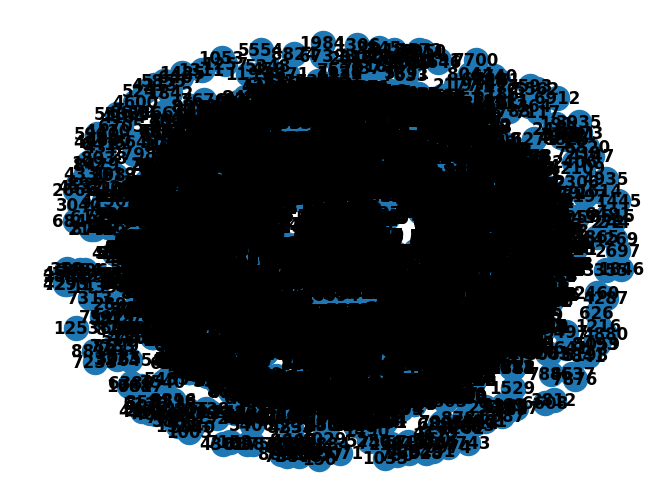

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

G = nx.Graph(name='G')

for i in range(len(data['Persona'])):
    G.add_node(i, name=i)


edges = []
for i in (range(len(data['Similar']))):
    for j in (range(len(data['Similar'][i]))):
        edges.append((i, data['Similar'][i][j][0]))

G.add_edges_from(edges)

print('\nGraph Nodes: ', G.nodes.data())

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [12]:
print(edges, sep = '\n')

[(0, 195), (0, 243), (0, 1808), (0, 4264), (0, 6658), (0, 6849), (0, 8088), (0, 8432), (1, 284), (1, 357), (1, 464), (1, 2039), (1, 2768), (1, 5988), (1, 6908), (1, 6978), (2, 406), (2, 1180), (2, 3092), (2, 6063), (2, 6131), (2, 8352), (3, 72), (3, 1327), (3, 1807), (3, 2832), (3, 5234), (3, 7330), (3, 8552), (4, 1112), (4, 1366), (4, 1710), (4, 5565), (4, 5888), (4, 6087), (4, 7316), (4, 8545), (5, 962), (5, 1120), (5, 1346), (5, 2853), (5, 3198), (5, 4418), (5, 6076), (5, 6221), (5, 6950), (6, 182), (6, 2100), (6, 2283), (6, 2493), (6, 3781), (6, 5830), (6, 6928), (6, 7364), (7, 112), (7, 827), (7, 2793), (7, 3188), (7, 3591), (7, 3838), (7, 4877), (7, 5259), (7, 6660), (8, 963), (8, 7941), (9, 166), (9, 2542), (9, 3546), (10, 412), (10, 1230), (10, 7440), (10, 7536), (10, 7613), (11, 47), (11, 196), (11, 2914), (11, 4445), (11, 4812), (11, 5292), (11, 7331), (12, 5531), (12, 7976), (13, 1206), (13, 1313), (13, 2706), (13, 3905), (13, 4032), (13, 4802), (13, 5323), (13, 6899), (13, 

In [13]:
#Get the Adjacency Matrix (A) and Node Features Matrix (X) as numpy array
A = np.array(nx.attr_matrix(G, node_attr='name')[0])
X = np.array(nx.attr_matrix(G, node_attr='name')[1])
X = np.expand_dims(X,axis=1)

print('Shape of A: ', A.shape)
print('\nShape of X: ', X.shape)
print('\nAdjacency Matrix (A):\n', A)
print('\nNode Features Matrix (X):\n', X)

Shape of A:  (8939, 8939)

Shape of X:  (8939, 1)

Adjacency Matrix (A):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Node Features Matrix (X):
 [[   0]
 [   1]
 [   2]
 ...
 [8936]
 [8937]
 [8938]]
